<h1>"Louis, I think this is the beginning of a beautiful friendship."</h1>

In [1]:
import numpy as np
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from os import listdir
from os.path import isfile, join
from PIL import Image
from sklearn.preprocessing import StandardScaler
import matplotlib.colors as mcolors

In [2]:
#Reading data
print("Reading data...")
data_filenames = []
for root, dirs, files in os.walk('data/raw_images/'):  
    for filename in files:
        data_filenames.append('data/raw_images/'+filename)

# data = [np.array(Image.open('data/raw_images/' + filename)) for filename in data_filenames]
# print("Number of raw images: \t", end="")
# print(len(data))

print("\nReading annotated images of segmentation...")
annot_filenames = []
for root, dirs, files in os.walk('data/class_color/'):  
    for filename in files:
        annot_filenames.append(filename)
    
annot = [np.array(Image.open('data/class_color/' + filename).convert('RGB')) for filename in annot_filenames ]
print("Number of annotated images: \t", end="")
print(len(annot))
# if len(data)==len(annot):
#     print("\nAll raw images are annotated.\n")


Reading data...

Reading annotated images of segmentation...
Number of annotated images: 	100


In [3]:
#Reading .csv file containing metadata about the segmentation
print("Reading file containing metadata about the segmentation...")
metadf = pd.read_csv('data/categories.csv', sep=',')

#Organizing subcategories into an array, and counting subcategories
subcat = []
no_subcat = 0
for row in metadf.name:
    subcat.append(row)
no_subcat = len(subcat)

#Organizing categories into an array
cat = []
for row in metadf.category:
    cat.append(row)

#Organizing category Ids into an array
catid = []
for row in metadf.catId:
    catid.append(row)
#Counting categories
no_cat = 1
act = catid[0]
categories = [] #array containing categories without duplication
categories.append(cat[0])
for i in range(len(catid)):
    if catid[i]!=act:
        categories.append(cat[i])
        no_cat+=1
        act=catid[i]

#Organizing subcategory RGB colors into an array
col = []
for row in metadf.color:
    c = row.replace(" ", "").split(',')
    rgb = []
    for i in c:
        rgb.append(int(i))
    col.append(rgb)


print('Number of segmentation subcategories:', no_subcat)
print('Number of segmentation categories:', no_cat, "\n")
print("Subcategories and their representational colors [R, G, B]: \n")
for i in range(len(subcat)):
    print("%30s \t" % subcat[i], end ="")
    print(col[i])


Reading file containing metadata about the segmentation...
Number of segmentation subcategories: 41
Number of segmentation categories: 8 

Subcategories and their representational colors [R, G, B]: 

                     unlabeled 	[0, 0, 0]
                       dynamic 	[111, 74, 0]
                   ego vehicle 	[0, 0, 0]
                        ground 	[81, 0, 81]
                        static 	[0, 0, 0]
                       parking 	[250, 170, 160]
                    rail track 	[230, 150, 140]
                          road 	[128, 64, 128]
                      sidewalk 	[244, 35, 232]
                        bridge 	[150, 100, 100]
                      building 	[70, 70, 70]
                         fence 	[190, 153, 153]
                        garage 	[180, 100, 180]
                    guard rail 	[180, 165, 180]
                        tunnel 	[150, 120, 90]
                         wall  	[102, 102, 156]
                        banner 	[250, 170, 100]
               

In [4]:
catid_annot_filenames = []
for root, dirs, files in os.walk('data/catid_annot/'):  
    for filename in files:
        catid_annot_filenames.append('data/catid_annot/'+filename)

catid_annot = []
if len(catid_annot_filenames) == len(annot):
    print('Catid Files Already Exist')
#     for img in range(len(annot)):
#         catid_annot_img = np.fromfile('data/catid_annot/'+str(img) +'.txt', dtype=int)
#         catid_annot.append(catid_annot_img)
        
if len(catid_annot_filenames) != len(annot):
    print('Catid Files DO NOT Exist')
    for img in range(len(annot)):
        catid_annot_img = []
        for index, row in enumerate(annot[img]):
            blabla = []
            for j, pixel in enumerate(row):
                blabla.append(col.index(list(row[j])))
            catid_annot_img.append(blabla)
        np.array(catid_annot_img).tofile('data/catid_annot/' +str(img) +'.txt')
        catid_annot.append(catid_annot_img)
        catid_annot_filenames = []
        for root, dirs, files in os.walk('data/catid_annot/'):  
            for filename in files:
                catid_annot_filenames.append('data/catid_annot/'+filename)
        
# if len(catid_annot) == len(annot):
#     print('Reading in subcategory id annotated matrices: successful')
# else :
#     print('Reading in subcategory id annotated matrices: UNSUCCESSFUL')

Catid Files Already Exist


In [5]:
#Splitting data into train-validation-test parts with ratios 70-20-10
print("Splitting data into training data, validation data, test data")
nb_samples=len(data_filenames)
#Splitting ratios:
valid_split = 0.2
test_split = 0.1
train_split = 0.7
print("The ratios are: ")
print("\t train:\t", train_split )
print("\t validation:\t",valid_split )
print("\t test:\t",test_split)
    
#Splitting
data_train = np.array(data_filenames[0:int(nb_samples*(1-valid_split-test_split))])
annot_train = np.array(catid_annot_filenames[0:int(nb_samples*(1-valid_split-test_split))])
data_valid = data_filenames[int(nb_samples*(1-valid_split-test_split)):int(nb_samples*(1-test_split))]
annot_valid = catid_annot_filenames[int(nb_samples*(1-valid_split-test_split)):int(nb_samples*(1-test_split))]
data_test  = data_filenames[int(nb_samples*(1-test_split)):]
annot_test  = catid_annot_filenames[int(nb_samples*(1-test_split)):]

# #Separation of axes (RGB channels)
# red_train = []
# green_train = []
# blue_train = []
# for img in data_train:
#     image = np.array(img.ravel(), dtype='float64')
#     red_train.append(image[0::3])
#     green_train.append(image[1::3])
#     blue_train.append(image[2::3])


# #Standardizing
# scaler = StandardScaler()

# scaler.fit(np.reshape(red_train, (-1, 1)))
# red_std = scaler.transform(red_train)

# scaler.fit(np.reshape(green_train, (-1,1)))
# green_std = scaler.transform(green_train)

# scaler.fit(np.reshape(blue_train, (-1,1)))
# blue_std = scaler.transform(blue_train)

print("\nNumber of training samples:\t", len(data_train))
print("Number of validation samples:\t", len(data_valid))
print("Number of test samples:\t", len(data_test))

Splitting data into training data, validation data, test data
The ratios are: 
	 train:	 0.7
	 validation:	 0.2
	 test:	 0.1

Number of training samples:	 70
Number of validation samples:	 20
Number of test samples:	 10


In [6]:
import tensorflow as tf
from tensorflow.python.client import device_lib

In [7]:
import cv2
import imageio
import json

In [8]:
from keras.backend.tensorflow_backend import set_session
from keras.utils.np_utils import to_categorical
from keras.applications import imagenet_utils

Using TensorFlow backend.


In [9]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
set_session(tf.Session(config=config))
# Device check
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17057651280726395021
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3207476019
locality {
  bus_id: 1
  links {
  }
}
incarnation: 17954670693861831742
physical_device_desc: "device: 0, name: GeForce GTX 960M, pci bus id: 0000:01:00.0, compute capability: 5.0"
]


In [10]:
def preprocess_input(x):
    return imagenet_utils.preprocess_input(x, mode='tf')

In [11]:
def data_generator(images, labels, batch_size=32, dim=(1024, 2048), n_classes=34, shuffle=True):
    # Initialization
    
    data_size = len(images)
    nbatches = data_size // batch_size
    list_IDs = np.arange(data_size)
    indices = list_IDs
    
    # Data generation
    while True:
        print("elegemvan")
        
        if shuffle == True:
            np.random.shuffle(indices)
        for index in range(nbatches):
            batch_indices = indices[index*batch_size:(index+1)*batch_size]

            X = np.empty((batch_size, *dim, 3))
            y_semseg = np.empty((batch_size, *dim), dtype=int)

            for i, ID in enumerate(batch_indices):
                image = cv2.resize(np.array(imageio.imread(images[ID]), dtype=np.uint8), dim[1::-1])
                catid_annot_img = np.fromfile(labels[ID], dtype=int)
                label = cv2.resize(catid_annot_img, dim[1::-1], interpolation=cv2.INTER_NEAREST)
                X[i,] = image

#                 fujj = []
                
#                 for index, row in enumerate(label):
#                     blabla = []
#                     for j, pixel in enumerate(row):
#                         blabla.append(col.index(list(row[j])))
#                     fujj.append(blabla)
#                    #     print(pixel)
#                #     print(col.index(row[index]))
#                 #        print(label[n])
                
                    
#          #       print(fujj.shape)
                y_semseg[i] = label
   
            yield (preprocess_input(X), to_categorical(y_semseg, num_classes=n_classes))

In [12]:
batch_size = 4
data_shape= imageio.imread(data_train[0]).shape[:2]
classes = no_subcat

print(data_shape)

(720, 1280)


In [13]:
train_generator = data_generator(data_train[:10], annot_train[:10], batch_size=batch_size, dim=data_shape, n_classes=classes)
val_generator = data_generator(data_valid[:10], annot_valid[:10], batch_size=batch_size, dim=data_shape, n_classes=classes)

elegemvan


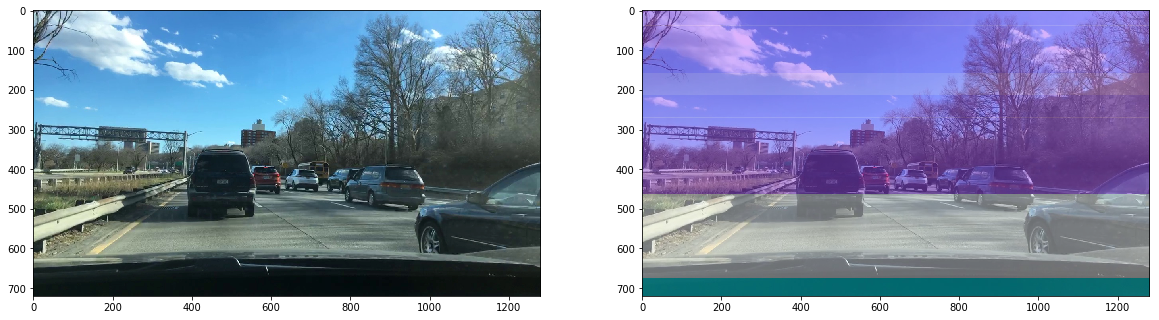

In [14]:
i = 0
image, label = next(train_generator)
image = image[i]
label = np.argmax(label[i], axis=-1)

fig=plt.figure(figsize=(20, 10))

cm = plt.get_cmap('gist_ncar')

fig.add_subplot(1, 2, 1)
plt.imshow(image * .5 + .5)
fig.add_subplot(1, 2, 2)
plt.imshow((image * .5 + .5) * .6 + cm(label/34.)[...,:3] * .4)
plt.show()

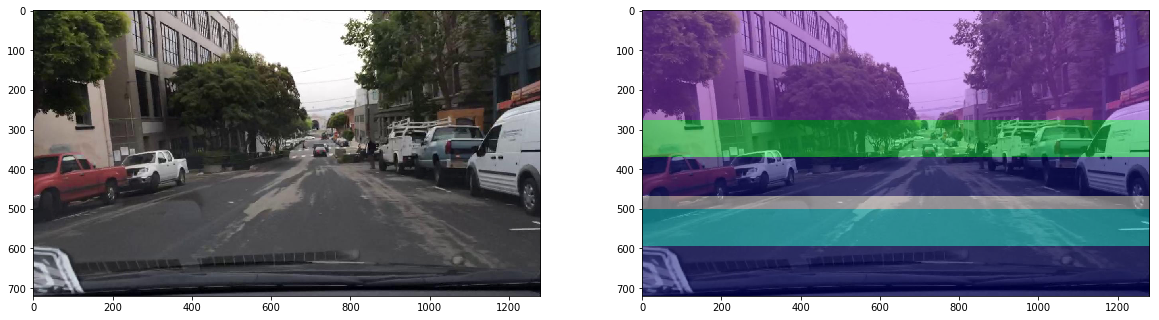

In [15]:
i = 0
image, label = next(train_generator)
image = image[i]
label = np.argmax(label[i], axis=-1)

fig=plt.figure(figsize=(20, 10))

cm = plt.get_cmap('gist_ncar')

fig.add_subplot(1, 2, 1)
plt.imshow(image * .5 + .5)
fig.add_subplot(1, 2, 2)
plt.imshow((image * .5 + .5) * .6 + cm(label/34.)[...,:3] * .4)
plt.show()

In [16]:
import keras.models as models
from keras.models import Model
from keras.layers import Input
from keras.layers.core import Dense, Dropout, Activation, Flatten, Reshape, Permute
from keras.layers.convolutional import Conv2D, MaxPooling2D, UpSampling2D, ZeroPadding2D
from keras.layers.normalization import BatchNormalization
from keras import backend as K

In [17]:
def create_encoding_layers(input_layer):
    kernel = 3
    filter_size = 64
    pool_size = 2
    
    x = Conv2D(filter_size, kernel, padding='same')(input_layer)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(pool_size, pool_size))(x)

    x = Conv2D(128, kernel, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(pool_size, pool_size))(x)

    x = Conv2D(256, kernel, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(pool_size, pool_size))(x)

    x = Conv2D(512, kernel, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    return x

In [18]:
def create_decoding_layers(input_layer):
    kernel = 3
    filter_size = 64
    pool_size = 2

    x = Conv2D(512, kernel, padding='same')(input_layer)
    x = BatchNormalization()(x)

    x = UpSampling2D(size=(pool_size,pool_size))(x)
    x = Conv2D(256, kernel, padding='same')(x)
    x = BatchNormalization()(x)

    x = UpSampling2D(size=(pool_size,pool_size))(x)
    x = Conv2D(128, kernel, padding='same')(x)
    x = BatchNormalization()(x)

    x = UpSampling2D(size=(pool_size,pool_size))(x)
    x = Conv2D(filter_size, kernel, padding='same')(x)
    x = BatchNormalization()(x)
    
    return x

In [19]:
input_layer = Input((*data_shape, 3))

In [20]:
encoded_layer = create_encoding_layers(input_layer)
decoded_layer = create_decoding_layers(encoded_layer)

In [21]:
final_layer = Conv2D(classes, 1, padding='same')(decoded_layer)
final_layer = Activation('softmax')(final_layer)

In [22]:
semseg_model = Model(inputs=input_layer, outputs=final_layer)

In [23]:
semseg_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [24]:
semseg_model.fit_generator(generator=train_generator,
                          steps_per_epoch=len(data_train) // batch_size,
                           epochs=1, validation_data=val_generator,
                           validation_steps=len(data_valid) // batch_size)

Epoch 1/1
elegemvan
elegemvan
elegemvan
elegemvan
elegemvanelegemvan

elegemvanelegemvan

elegemvan
elegemvan
elegemvan
elegemvan


InternalError: Dst tensor is not initialized.
	 [[{{node _arg_activation_5_target_0_1/_381}} = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device_incarnation=1, tensor_name="edge_3282__arg_activation_5_target_0_1", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:GPU:0"]()]]
	 [[{{node loss/mul/_435}} = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_3348_loss/mul", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

In [ ]:
semseg_model.save_weights('trained_model.h5')